# With tax

In [1]:
import pandas as pd
import numpy as np

# import os
# import sys
# module_path = os.path.abspath(os.path.join('..'))
# print(module_path)
# sys.path.append(module_path)
import model.parts.utils as utils
from model.sys_params import *
from model.sim_setup import SIMULATION_TIME_STEPS
df = pd.read_pickle(r'experiment.p')

# Read in with tax experiment frozen to show A/B
# df = pd.read_pickle(r'experiment_with_tax.p')

stakeDelegateds: 605 events
stakeDelegatedLockeds: 375 events
stakeDelegatedWithdrawns: 326 events
allocationCloseds: 47 events
allocationCollecteds: 16 events
stakeDepositeds: 25 events
rewardsAssigneds: 47 events
delegationParametersUpdateds: 6 events
allocationCreateds: 51 events
TOTAL NUMBER OF EVENTS: 1529
You should set SIMULATION_TIME_STEPS in config.py to a minimum of 1529 to capture all events.

running file: sim_setup.py
end of file: sim_setup.py


In [2]:
df.reset_index(inplace = True)
pd.set_option('display.max_rows', None)

In [3]:
df.head()

,index,indexers,delegator_portfolios,block_number,epoch,injected_event_shift,simulation,subset,run,substep,timestep
0,6,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,1
1,12,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474009,4,0,0,0,1,6,2
2,18,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{},11474307,4,0,0,0,1,6,3
3,24,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474332,4,0,0,0,1,6,4
4,30,{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e':...,{'0xd776a7306ee6a060cebb46b46d305e88fd39ba84':...,11474426,4,0,0,0,1,6,5


In [4]:
for i in df.indexers:
    print(i['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'].delegators[1])

self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1, self.shares=0, self.holdings=Decimal('10000000000'), self.undelegated_tokens=0
self.id=1,

In [5]:
from model.parts.portfolio import Portfolio
portfolios = df['delegator_portfolios']
portfolio_values = {}
timestep = 0
for i in portfolios:
    for delegator_id, values in i.items():
        if delegator_id not in portfolio_values:
            portfolio_values[delegator_id] = {}
        portfolio_values[delegator_id][timestep] = values
    timestep += 1
delegator_values_df = pd.DataFrame(portfolio_values)
for i in delegator_values_df.columns:
    delegator_values_df[i] = [Portfolio(i) if j != j else j for j in delegator_values_df[i]]
delegator_values_df.head()

,0xd776a7306ee6a060cebb46b46d305e88fd39ba84,1
3,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
4,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
5,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
6,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...
7,<class 'model.parts.portfolio.Portfolio'>: {'i...,<class 'model.parts.portfolio.Portfolio'>: {'i...


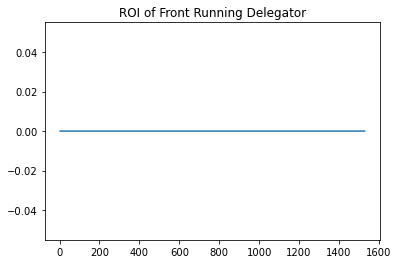

In [6]:
import matplotlib.pyplot as plt
ROI_list = []
for i, values in delegator_values_df[1].items():
    ROI_list.append(values.ROI)
plt.plot(delegator_values_df.index, ROI_list)
plt.title('ROI of Front Running Delegator');

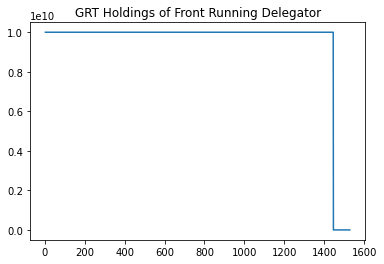

In [7]:
holdings_list = []
for i, values in delegator_values_df[1].items():
    holdings_list.append(values.holdings)
plt.plot(delegator_values_df.index, holdings_list)
plt.title('GRT Holdings of Front Running Delegator');
#plt.ylim(0, 1100000000);

Here we see the front runner delegates all their tokens to the indexer.

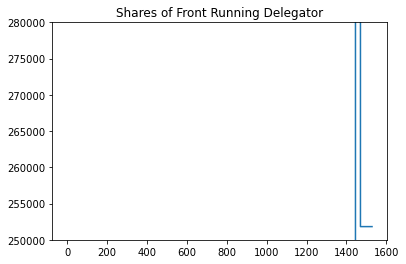

In [8]:
shares_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
plt.plot(delegator_values_df.index, shares_list)
plt.title('Shares of Front Running Delegator')
plt.ylim(250000, 280000);

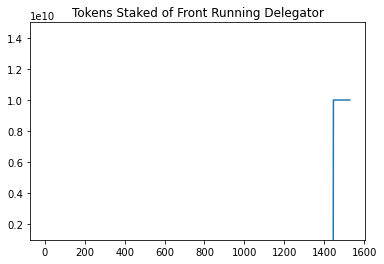

In [9]:
input_tokens_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        input_tokens_list.append(values.indexer_in_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        input_tokens_list.append(0)
plt.plot(delegator_values_df.index, input_tokens_list)
plt.title('Tokens Staked of Front Running Delegator');
plt.ylim(1000000000,15000000000);

Here we see quite a large difference between shares and tokens indicating there being quite a bit of GRT in the pool. 

Text(0.5, 1.0, 'Tokens Staked of Front Running Delegator')

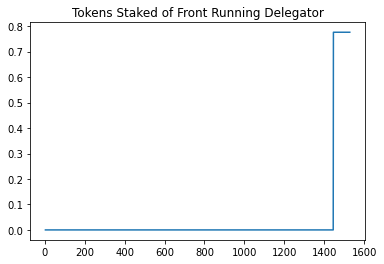

In [10]:
indexer_price_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        indexer_price_list.append(values.indexer_price['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_price_list.append(0)
plt.plot(delegator_values_df.index, indexer_price_list)
plt.title('Tokens Staked of Front Running Delegator')
#plt.ylim(250000,280000);

Here we see the price that the delegator gets is quite low when they delegate. 

In [11]:
for i, values in delegator_values_df[1].items():
    if values.indexer_locked_tokens != {}:
        print(values.indexer_locked_tokens)

{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e': Decimal('8000044220.600155891655092069')}
{'0x7ab4cf25330ed7277

got_shares  1446
got_shares  1447
got_shares  1448
got_shares  1449
got_shares  1450
got_shares  1451
got_shares  1452
got_shares  1453
got_shares  1454
got_shares  1455
got_shares  1456
got_shares  1457
got_shares  1458
got_shares  1459
got_shares  1460
got_shares  1461
got_shares  1462
got_shares  1463
got_shares  1464
got_shares  1465
got_shares  1466
got_shares  1467
got_shares  1468
got_shares  1469
got_shares  1470
got_locked tokens  1470
got_shares  1471
got_locked tokens  1471
got_shares  1472
got_locked tokens  1472
got_shares  1473
got_locked tokens  1473
got_shares  1474
got_locked tokens  1474
got_shares  1475
got_locked tokens  1475
got_shares  1476
got_locked tokens  1476
got_shares  1477
got_locked tokens  1477
got_shares  1478
got_locked tokens  1478
got_shares  1479
got_locked tokens  1479
got_shares  1480
got_locked tokens  1480
got_shares  1481
got_locked tokens  1481
got_shares  1482
got_locked tokens  1482
got_shares  1483
got_locked tokens  1483
got_shares  1484
g

Text(0.5, 1.0, 'Front Running Delegator')

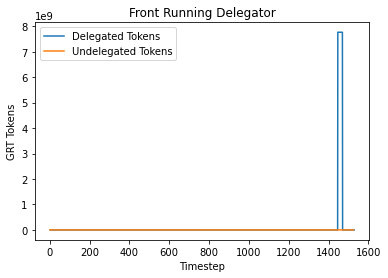

In [12]:
indexer_locked_list = []
shares_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values.indexer_shares)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        print('got_shares ',i)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        print('got_locked tokens ',i)
        
        indexer_locked_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.legend(['Delegated Tokens','Undelegated Tokens'])
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.title('Front Running Delegator')

Text(0.5, 1.0, 'Front Running Delegator')

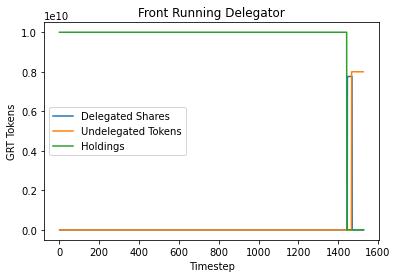

In [13]:
indexer_locked_list = []
shares_list = []
holdings_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        # print('got_shares ',i, ' values.indexer_shares ', values.indexer_shares)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        # print('got_locked tokens ',i, ' values.indexer_locked_tokens ', values.indexer_locked_tokens)
        indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
    if values.holdings != {}:
        holdings_list.append(values.holdings)
    else:
        indexer_locked_list.append(0)
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.title('Front Running Delegator')

In [14]:
indexer_locked_list = []
shares_list = []
holdings_list = []
for i, values in delegator_values_df[1].items():
    # print(i)
    # print(values)
    # print(values.indexer_locked_tokens)
    if values.indexer_shares != {}:
        print('got_shares ',i, ' values.indexer_shares ', values.indexer_shares)
        shares_list.append(values.indexer_shares['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        shares_list.append(0)
    if values.indexer_locked_tokens != {}:
        print('got_locked tokens ',i, ' values.indexer_locked_tokens ', values.indexer_locked_tokens)
        indexer_locked_list.append(values.indexer_locked_tokens['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_locked_list.append(0)
    if values.holdings != {}:
        print('got holdings ',i, ' values.holdings ', values.holdings)
        
        holdings_list.append(values.holdings)
    else:
        indexer_locked_list.append(0)

got holdings  3  values.holdings  10000000000
got holdings  4  values.holdings  10000000000
got holdings  5  values.holdings  10000000000
got holdings  6  values.holdings  10000000000
got holdings  7  values.holdings  10000000000
got holdings  8  values.holdings  10000000000
got holdings  9  values.holdings  10000000000
got holdings  10  values.holdings  10000000000
got holdings  11  values.holdings  10000000000
got holdings  12  values.holdings  10000000000
got holdings  13  values.holdings  10000000000
got holdings  14  values.holdings  10000000000
got holdings  15  values.holdings  10000000000
got holdings  16  values.holdings  10000000000
got holdings  17  values.holdings  10000000000
got holdings  18  values.holdings  10000000000
got holdings  19  values.holdings  10000000000
got holdings  20  values.holdings  10000000000
got holdings  21  values.holdings  10000000000
got holdings  22  values.holdings  10000000000
got holdings  23  values.holdings  10000000000
got holdings  24  va

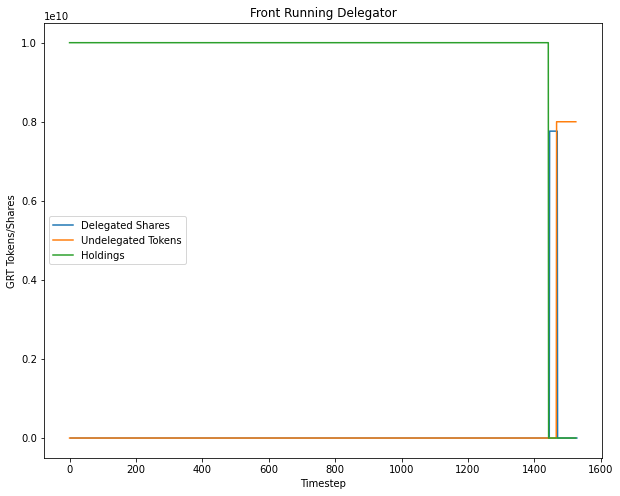

In [15]:
plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens/Shares')
plt.title('Front Running Delegator')
plt.show()

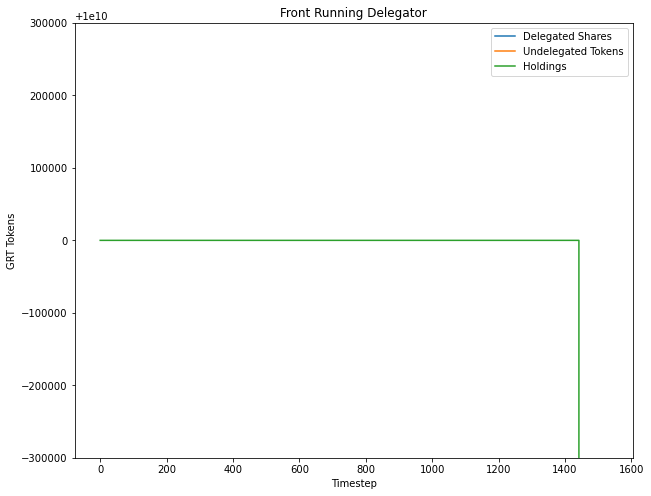

In [16]:
plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, shares_list,indexer_locked_list)
plt.plot(holdings_list)
plt.legend(['Delegated Shares','Undelegated Tokens', 'Holdings']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
plt.ylim(10000000000-300000,10000000000+300000)
plt.title('Front Running Delegator')
plt.show()

In [17]:
indexer_price_list = []
for i, values in delegator_values_df[1].items():
    if values.indexer_shares != {}:
        indexer_price_list.append(values.indexer_price['0x7ab4cf25330ed7277ac7ab59380b68eea68abb0e'])
    else:
        indexer_price_list.append(1)

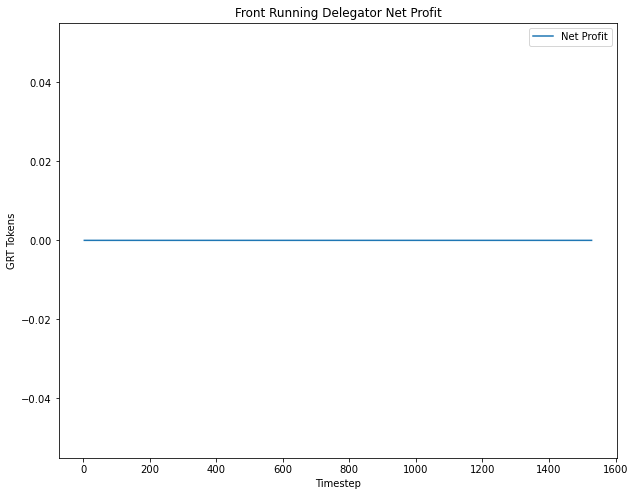

In [18]:
holdings_list = [float(x) for x in holdings_list]
indexer_locked_list = [float(x) for x in indexer_locked_list]
shares_list = [float(x) for x in shares_list]
indexer_price_list = [float(x) for x in indexer_price_list]
shares_value = [b_i / a_i for a_i, b_i in zip(indexer_price_list, shares_list)]
# print(indexer_locked_list[0])
# net_profit = [a_i + b_i + c_i - holdings_list[0] for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]
net_profit = [max(a_i + b_i - holdings_list[0],0) for a_i, b_i in zip(indexer_locked_list, holdings_list)]

# [print(type(a_i), type(b_i), type(c_i)) for a_i, b_i, c_i in zip(indexer_locked_list, holdings_list, shares_value)]
# net_profit = [a_i + b_i - holdings_list[0] for a_i, b_i in zip(indexer_locked_list, holdings_list)]

plt.figure(figsize=(10, 8))
plt.plot(delegator_values_df.index, net_profit)
# plt.plot(holdings_list)
plt.legend(['Net Profit']) 
plt.xlabel('Timestep')
plt.ylabel('GRT Tokens')
# plt.ylim(10000000000-300000,10000000000+300000)
plt.title('Front Running Delegator Net Profit')
plt.show()